Основные материалы этой работы загружены на [HF](https://huggingface.co/collections/Roaoch/urfu-ml-6769a1b1e8fcf8c6f16c8f69)

[Репозиторий с кодом](https://github.com/Roaoch/ml_ecomm)

**Тема:** Стилизация текста ответов на отзывы и вопросы к товарам на WildBerries

**Данные** Датасет состоит из трех частей: [Проудкты](https://huggingface.co/datasets/nyuuzyou/wb-products), [Отзывы](https://huggingface.co/datasets/nyuuzyou/wb-feedbacks), [Вопросы](https://huggingface.co/datasets/nyuuzyou/wb-questions). Все данные спрашены с WildBerries

Описание датасета **Проудкты**:
* imt_id - id продукта (одинаковый для разных nm_colors_names)
* nm_id - id продукта (уникален)
* imt_name - название продукта
* subj_name - название подкатегории
* subj_root_name - название категории
* nm_colors_names - вариация товара (в основном цвет)
* vendor_code - код товара
* description - описание товара
* brand_name - название продавца

Описание датасета **Отзывы**:
* nmId - id продукта, к которому оставлен отзыв (равен numId продукта)
* productValuation - оценка
* color - вариация продукта, на который оставлен отзыв
* text - текст отзыва
* answer - ответ магазина на отзыв

Описание датасета **Вопросы**:
* imtId - id продукт, по которому задали вопрос (одинаковый для разных вариаций продукта)
* nmId - id продукта, к которому оставлен отзыв (равен numId продукта)
* productName - название продукта, к которому оставлен отзыв
* supplierArticle - артикул товара 
* supplierId - id продавца
* supplierName - полное название продавца
* brandName - название продавца
* question - текст вопроса
* answer - ответ магазина на вопрос

In [1]:
import datasets
import os

# Загрузка датасета

Возникла ошибка, которая не позволяла мне использовать встроенный функционал
Пришлось клонировать репозиторий и вручную загружать данные

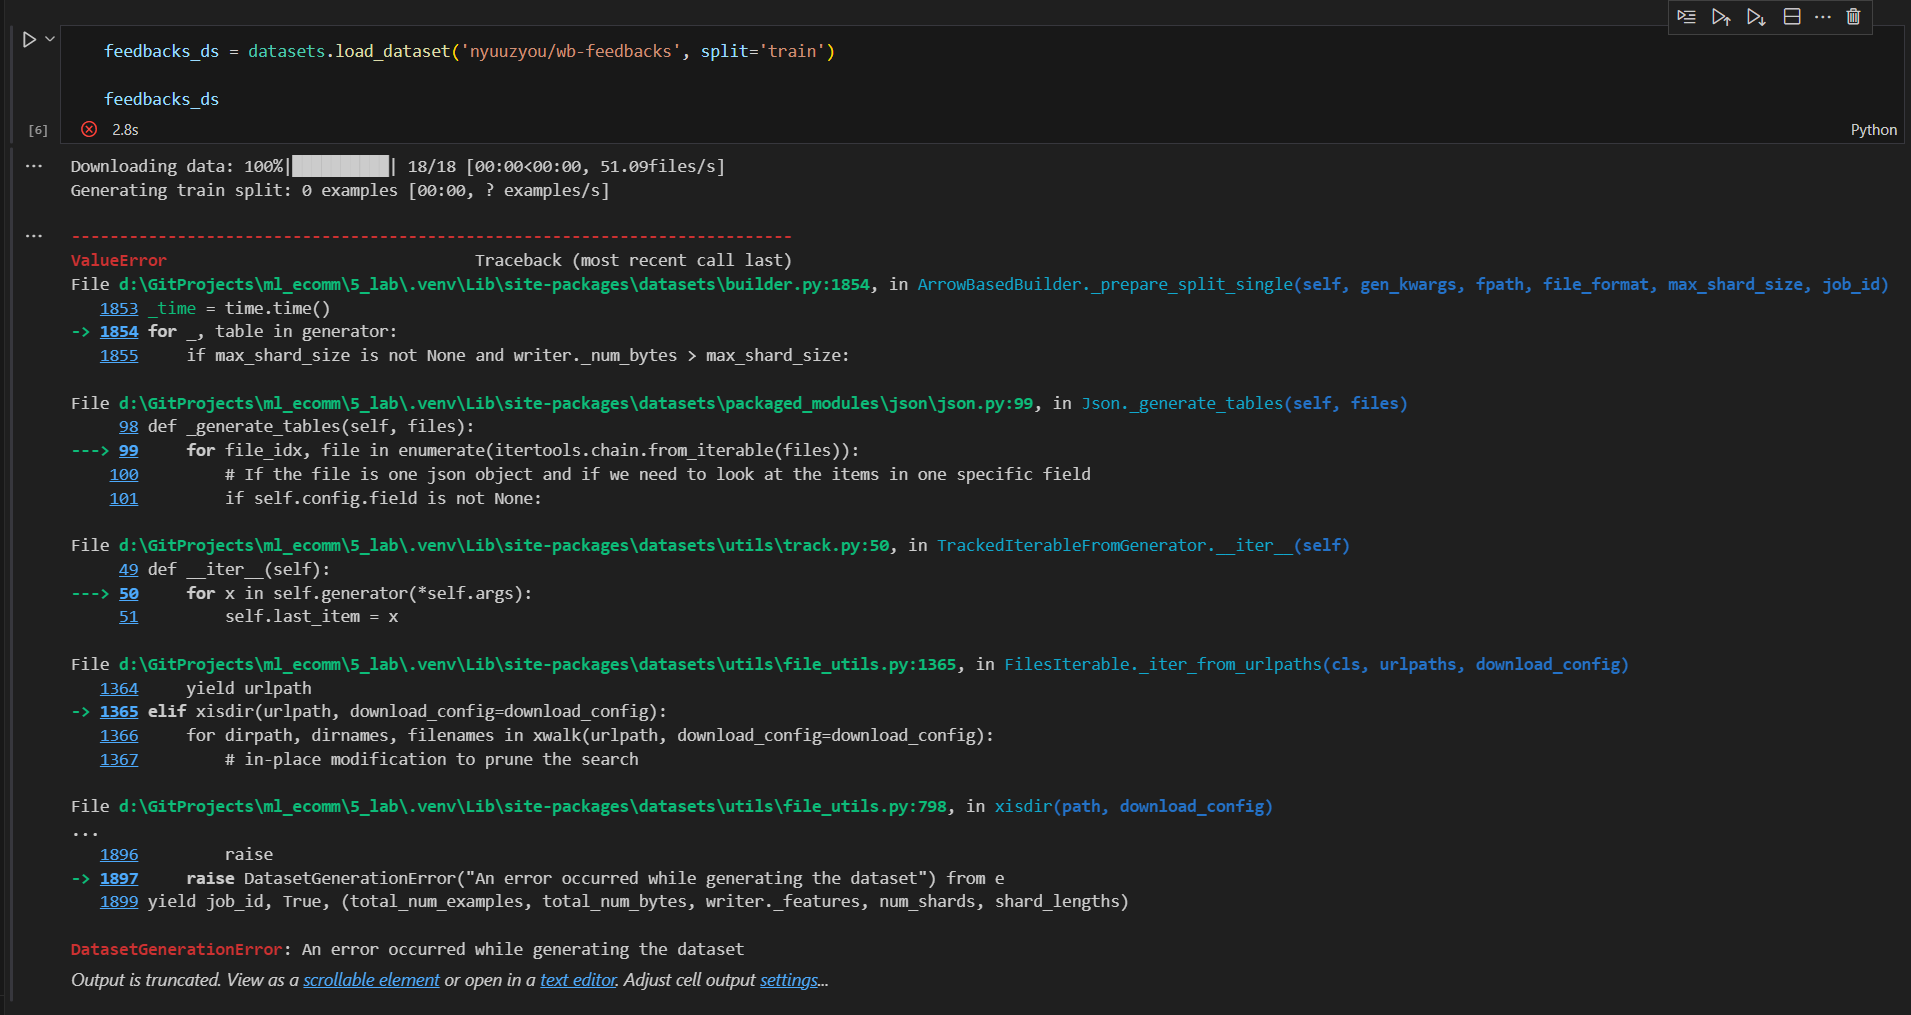

Данные не помещаются в оперативную память на моем ноутбуке, так что пришлось использовать datasets, вместо pandas

In [2]:
def custom_read_script(path: str) -> datasets.Dataset:
    files = filter(lambda e: e.endswith('.json.zst'), os.listdir(path))
    all_ds = []

    for file in files:
        ds = datasets.Dataset.from_json(f'{path}/{file}', cache_dir='.cache')
        all_ds.append(
            ds
        )
        ds.cleanup_cache_files() # type: ignore

    return datasets.concatenate_datasets(all_ds)

In [4]:
feedback_ds = custom_read_script('__input__/wb-feedbacks')

feedback_ds

Loading dataset shards:   0%|          | 0/31 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/26 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['nmId', 'productValuation', 'color', 'text', 'answer'],
    num_rows: 190295785
})

In [6]:
feedback_ds.to_parquet('./__input__/feedback.parquet')

Creating parquet from Arrow format:   0%|          | 0/190296 [00:00<?, ?ba/s]

90683685605

In [4]:
products_ds = custom_read_script('__input__/wb-products')

products_ds

Loading dataset shards:   0%|          | 0/131 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/128 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/155 [00:00<?, ?it/s]

Dataset({
    features: ['imt_id', 'nm_id', 'imt_name', 'subj_name', 'subj_root_name', 'nm_colors_names', 'vendor_code', 'description', 'brand_name'],
    num_rows: 153257897
})

In [6]:
products_ds.to_parquet('C:/users/roaoc/products.parquet')

Creating parquet from Arrow format:   0%|          | 0/153258 [00:00<?, ?ba/s]

207354959286

In [6]:
questions_ds = datasets.Dataset.from_json('__input__/wb-questions/questions.json')

questions_ds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['imtId', 'nmId', 'productName', 'supplierArticle', 'supplierId', 'supplierName', 'brandName', 'question', 'answer'],
    num_rows: 7410007
})

In [7]:
questions_ds.to_parquet('./__input__/questions.parquet') # type: ignore

Creating parquet from Arrow format:   0%|          | 0/7411 [00:00<?, ?ba/s]

3540418723

# Итог

3 датасета:
* Продукты - 39.1 GB
* Отзывы - 22.9 GB
* Вопросы - 0.97 GB